In [1]:
#hal pertama yang dilakukan
import pandas as pd
import numpy as np
import scipy as sp

#plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#decisiontree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

#imputersist untuk mengisi missing value
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

#hash hampir lupa
#Support Vector Machines
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# melihat semua yang ada dalam dataset
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#mari kita cek sama2

data.info()
print("_" * 40)

#tipedata yang nanti digunakan harus bersifat float. sebelumnya ada error disini

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________


In [6]:
#mengkorelasikan beberapa kolom yang insyaAllah bakal digunakan '-'
#di sesuaikan per nilai isi atribut tsb (YANG PALING TINGGI NILAI HIDUPNYA)
#pcclass duls sist

data[['Pclass', 'Survived']].groupby(['Pclass'] , as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
#lanjut ke jenis kelamin

data[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
#SibSp
#perlu diingat ini di urutkan dr survive "FALSE" ato yg paling tinggi tingkat hidupnye

data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
#parch sist

data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [10]:
#disini saya memutuskan untuk menghilangkan kolom cabin & tiket karna ada banyak data yg hilang serta 
#nantinya dapat berpengaruh dengan hasil akurasi yang kita dapatkan

data = data.drop(['Ticket', 'Cabin'], axis=1)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [12]:
#split title seperti modul sebelume

data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=10,column="Title")

In [13]:
title_map={"Capt":"Officer",
          "Col":"Officer",
          "Major":"Officer",
          "Johkheer":"Royalty",
          "Don":"Royalty",
          "Sir":"Royalty",
          "Dr":"Royalty",
          "Rev":"Officer",
          "The Countess":"Royalty",
          "Dona":"Royalty",
          "Mme":"Mrs",
          "Mlle":"Miss",
          "Ms":"Mrs",
           "Mr":"Mr",
           "Mrs":"Mrs",
           "Miss":"Miss",
           "Master":"Master",
           "Lady":"Royalty" }

data["Title"]=data.Title.map(title_map)

In [14]:
#title sist

data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.701087
0,Master,0.575000
5,Royalty,0.500000
4,Officer,0.181818
2,Mr,0.156673


In [15]:
#selanjutnya kita akan mengubah data title yang categorical tadi menjadi data ordinal untuk memudahkan perhitungan

data['Title'] = pd.factorize(data.Title)[0]
data['Title'].unique()

array([ 0,  1,  2,  3,  4,  5, -1], dtype=int64)

In [16]:
#title sist

data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [17]:
#title beres. Name&PassengerID di drop ya!!!

data = data.drop(['Name', 'PassengerId'], axis=1)

In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [19]:
#merubah nilai jenis kelamin juga

data['Sex'] = pd.factorize(data.Title)[0]
data['Sex'].unique()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,2,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


In [20]:
#cek missing values

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [21]:
#Karena ada beberapa data di kolom age yang kosong dan kita memerlukan kolom age untuk model kita karena memiliki 
#korelasi yang besar, maka kita perlu untuk mengisi age yang kosong tadi
#menggunakan library simpleimputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['Age']])
data[['Age']] = imputer.transform(data[['Age']])

In [22]:
#cek missing values

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [23]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,2,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


In [24]:
#merubah nilai AGE juga

data['Age'] = pd.factorize(data.Title)[0]
data['Age'].unique()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0,1,0,7.2500,S,0
1,1,1,1,1,1,0,71.2833,C,1
2,1,3,2,2,0,0,7.9250,S,2
3,1,1,1,1,1,0,53.1000,S,1
4,0,3,0,0,0,0,8.0500,S,0


In [25]:
#membuat family size

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [26]:
#buat isAlone yang sendirian diambil dr familysize

data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
    
data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [27]:
#drop kolom-kolom yang tidak kita pakai

data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,0,7.2500,S,0,0
1,1,1,1,1,71.2833,C,1,0
2,1,3,2,2,7.9250,S,2,1
3,1,1,1,1,53.1000,S,1,0
4,0,3,0,0,8.0500,S,0,1


In [28]:
#merubah nilai EMBARKED juga

data['Embarked'] = pd.factorize(data.Title)[0]
data['Embarked'].unique()
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,0,7.2500,0,0,0
1,1,1,1,1,71.2833,1,1,0
2,1,3,2,2,7.9250,2,2,1
3,1,1,1,1,53.1000,1,1,0
4,0,3,0,0,8.0500,0,0,1


In [29]:
#mengisi missing value EMBARKED

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['Embarked']])
data[['Embarked']] = imputer.transform(data[['Embarked']])

In [30]:
#cek missing values

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64

In [31]:
#hampir lupa kolom fare belum diubah jadi numeric

data['Fare'] = pd.factorize(data.Title)[0]
data['Fare'].unique()
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,0,0,0.0,0,0
1,1,1,1,1,1,1.0,1,0
2,1,3,2,2,2,2.0,2,1
3,1,1,1,1,1,1.0,1,0
4,0,3,0,0,0,0.0,0,1


In [32]:
#memisahkan kolom

xdata = data.drop('Survived', axis=1)
ydata = data.Survived

In [33]:
#memisahkan data 

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

In [34]:
# implementasi sist Decision Tree

clf=DecisionTreeClassifier()
clf=clf.fit(xtrain,ytrain)


In [35]:
#memprediksi data uji

ypred = clf.predict(xtest)

In [36]:
#akurasi

akurasidecision = (metrics.accuracy_score(ytest,ypred)*100)
print("Akurasi Decision Tree: ", akurasidecision) 

Akurasi Decision Tree:  77.98507462686567


In [37]:
# #implementasi Random Forest (selain decision sist)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xtrain, ytrain)
ypred = random_forest.predict(xtest)
random_forest.score(xtrain, ytrain)
akurasirandom = (random_forest.score(xtrain, ytrain) * 100)
print("Akurasi Random Forest: " , akurasirandom )

Akurasi Random Forest:  82.98555377207063


In [39]:
#implementasi SVM (Support Vector Machines)

svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
svc.score(xtrain, ytrain)
akurasiSVM = (svc.score(xtrain, ytrain)*100)
print("Akurasi SVM: " , akurasiSVM)

#akurasiSVM = print("Akurasi SVM: " ,svc.score(xtrain, ytrain)*100)
#akurasiSVM

Akurasi SVM:  81.38041733547352


In [40]:
#yuk mari kita bandingin sist

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest','Support Vector Machine'],
    'Score': [akurasidecision, akurasirandom, akurasiSVM]
})
models.sort_values(by="Score", ascending=False)

,Model,Score
1,Random Forest,82.985554
2,Support Vector Machine,81.380417
0,Decision Tree,77.985075


# Algoritma yang memiliki tingkat akurasi paling tinggi ialah Random Forest. Sekian^^

# -----------------

# MODUL Evaluation Classification 

In [41]:
#Masukkan data sesuai atribut ke X -> atribut predictor dan y -> atribut target

x = data.drop('Survived', axis=1)
y = data.Survived

In [42]:
#Bagi data menjadi data training dan data testing.
#Data training sebesar 70% dan sisanya adalah data testing.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

#Untuk menghindari over-fitting, maka dilakukan pembagian dataset ke dalam bentuk Train dan Test. 
#Berdasarakan syntax test size sebesar 0.3 yang berarti membagi dataset menjadi 70% data train dan 30% data test. 
#Pada syntax diatas menggunakan kunci random 27.

In [43]:
#Membuat model klasifikasi dengan algoritma KNN.
#Import library KNN.

from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Buat model klasifikasi dengan algoritma KNN dengan data training
#TRAIN MODEL

KNN = KNeighborsClassifier().fit(x_train, y_train)

In [45]:
#Prediksi data testing dengan model yang telah dibuat.

KNN_pred = KNN.predict(x_test)

In [46]:
#Evaluasi Model – Confusion matrix (akurasi, precision, recall, F1 score)
#Import library sklearn yang digunakan untuk metric evaluasi

from sklearn.metrics import classification_report, confusion_matrix

In [47]:
#Hitung dan tampilkan confusion matrix.
#Cara 1:

print(confusion_matrix(y_test, KNN_pred))

[[129  38]
 [ 27  74]]


In [48]:
#cara 2

pd.crosstab(y_test, KNN_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,129,38,167
1,27,74,101
All,156,112,268


CARI TAU:
Total data sejumlah 800 an, namun mengapa total data pada confusion matrik hanya 260 an?

Berdasarkan output confusion matrix diatas diketahui bahwa dengan metode KNN didapatkan hasil sebagai berikut:
1. Frekuensi prediksi penumpang yang dikatakan meninggal (0) dan sesuai dengan data aktual penumpang yang meninggal (0) sebanyak 129 orang. Keadaan seperti ini disebut sebagai “True Positive”.
2. Frekuensi prediksi penumpang yang dikatakan meninggal (0), namun pada data aktual menunjukan penumpang yang selamat (1) sebanyak 38 orang. Kasus Keadaan seperti ini disebut sebagai “False positive”.
3. Frekuensi prediksi penumpang yang dikatakan selamat (1), namun pada data aktual menunjukkan penumpang yang meninggal (0) sebanyak 27 orang. Keadaan seperti ini disebut sebagai “False Negative”.
4. Frekuensi prediksi penumpang yang dikatakan selamat (1) dan sesuai dengan data aktual penumpang yang selamat (1) adalah sebanyak 74 orang. Keadaan seperti ini disebut sebagai “True Negative”.

Maka dari itu total data pada confusion matrik hanya 268 (dijumlah semuanya) (0 positif - 1 negatif) dari Frekuensi prediksi penumpang yang dikatakan selamat , meninggal dan sesuai dengan data aktual penumpang yang selamat & meninggal

In [49]:
#Hitung nilai akurasi, precision, recall, dan F1 score

print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       167
           1       0.66      0.73      0.69       101

    accuracy                           0.76       268
   macro avg       0.74      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



Accuracy

Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data. Akurasi menjawab pertanyaan “Berapa persen penumpang yang benar diprediksi selamat dan meninggal dari keseluruhan penumpang

Precission

Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif. Precission menjawab pertanyaan “Berapa persen penumpang yang benar selamat dari keseluruhan penumpang yang di prediksi selamat?"

Recall (Sensitifitas)

Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Recall menjawab pertanyaan “Berapa persen penumpang yang diprediksi selamat dibanding keseluruhan penumpang yang sebenarnya selamat.

F1 Score

F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan

In [50]:
#Evaluasi Model – ROC AUC
#import library

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)

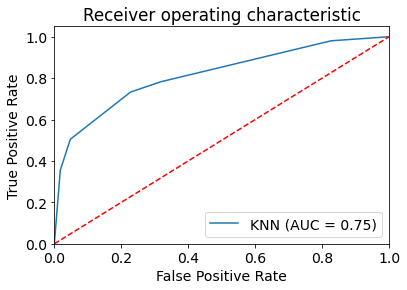

In [51]:
#Hitung FPR, TPR, dan nilai AUC

KNN_roc_auc = roc_auc_score(y_test, KNN.predict(x_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % KNN_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

TUGAS MAHASISWA 1
1. Silahkan coba dengan 2 algoritma lain, kemudian lakukan evaluasi terhadap model tersebut
(akurasi, precision, recall, dan F1 score serta ROC AUC)
2. Bandingkan evaluasi dari 2 model yang dihasilkan pada soal nomor 1. Jelaskan jawabanmu.

# pake randomforest sist (lanjut kemaren)

In [52]:
#algoritma randomforest classifier

RFF = random_forest.fit(xtrain, ytrain)

In [53]:
#Prediksi data testing 

ypred = random_forest.predict(xtest)

In [54]:
#Hitung dan tampilkan confusion matrix.

pd.crosstab(y_test, ypred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,124,43,167
1,68,33,101
All,192,76,268


In [55]:
#Hitung nilai akurasi, precision, recall, dan F1 score

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       167
           1       0.43      0.33      0.37       101

    accuracy                           0.59       268
   macro avg       0.54      0.53      0.53       268
weighted avg       0.57      0.59      0.57       268



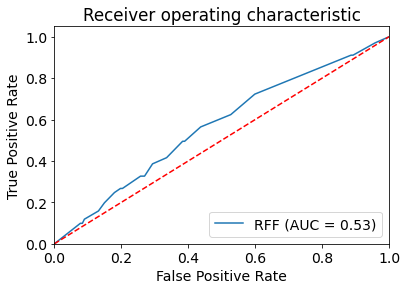

In [56]:
#Hitung FPR, TPR, dan nilai AUC

RFF_roc_auc = roc_auc_score(y_test, random_forest.predict(xtest))
rff_fpr, rff_tpr, rff_thresholds = roc_curve(y_test, random_forest.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(rff_fpr, rff_tpr, label='RFF (AUC = %0.2f)' % RFF_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# pake decision tree sist (lanjut kemaren)

In [69]:
clf=DecisionTreeClassifier()
clf=clf.fit(xtrain,ytrain)

In [70]:
ypred = clf.predict(xtest)

In [71]:
#Hitung dan tampilkan confusion matrix.

pd.crosstab(y_test, ypred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,124,43,167
1,68,33,101
All,192,76,268


In [72]:
#Hitung nilai akurasi, precision, recall, dan F1 score

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       167
           1       0.43      0.33      0.37       101

    accuracy                           0.59       268
   macro avg       0.54      0.53      0.53       268
weighted avg       0.57      0.59      0.57       268



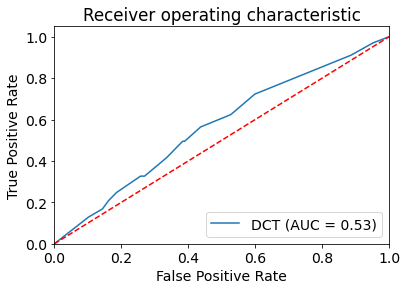

In [73]:
#Hitung FPR, TPR, dan nilai AUC

DCT_roc_auc = roc_auc_score(y_test, clf.predict(xtest))
dct_fpr, dct_tpr, dct_thresholds = roc_curve(y_test, clf.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(dct_fpr, dct_tpr, label='DCT (AUC = %0.2f)' % DCT_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [77]:
#Bandingkan evaluasi dari 2 model yang dihasilkan pada soal nomor 1. Jelaskan jawabanmu.

models = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'Score': [RFF_roc_auc, DCT_roc_auc]
})
models.sort_values(by="Score", ascending=False)

,Model,Score
0,Random Forest,0.534624
1,Decision Tree,0.534624


nilai evaluasi dari dari random forest & decision tree bernilai sama.
rumus yang digunakan juga sama akan tetapi berbeda nilai nya saat “True Positive” , “False positive” , “False Negative”, “True Negative”.

# BAGIAN 2 – Jenis Pembagian Data Cross-Val


In [78]:
#Import library 

from sklearn.model_selection import cross_val_score

In [80]:
#Definisikan algoritma yang digunakan

KNN = KNeighborsClassifier()

In [81]:
#Pecah data menggunakan metode cross validation dengan k = 5, sekaligus hitung score akurasinya

scores_accuracy_knn = cross_val_score (KNN, x, y, cv=5, scoring="accuracy")

In [82]:
print(scores_accuracy_knn)
print("Rata-rata nilai Akurasi KNN: %0.2f (+/- %0.2f)" % (scores_accuracy_knn.mean(), scores_accuracy_knn.std()))

[0.60893855 0.74719101 0.75842697 0.73595506 0.79213483]
Rata-rata nilai Akurasi KNN: 0.73 (+/- 0.06)


In [83]:
#Hitung score Precision Macro

scores_precision_knn = cross_val_score (KNN, x, y, cv=5, scoring="precision_macro")
print(scores_precision_knn)
print("Rata-rata nilai Precision Macro KNN: %0.2f (+/- %0.2f)" % (scores_precision_knn.mean(), scores_precision_knn.std()))

[0.63275418 0.7324159  0.75363694 0.7250566  0.78173375]
Rata-rata nilai Precision Macro KNN: 0.73 (+/- 0.05)


In [84]:
#Hitung score Recall Macro

scores_recall_knn = cross_val_score (KNN, x, y, cv=5, scoring="recall_macro")
print(scores_recall_knn)
print("Rata-rata nilai Recall Macro KNN: %0.2f (+/- %0.2f)" % (scores_recall_knn.mean(), scores_recall_knn.std()))

[0.6359025  0.73368984 0.76804813 0.69933155 0.79038692]
Rata-rata nilai Recall Macro KNN: 0.73 (+/- 0.05)


In [85]:
#Hitung score F1 Macro

scores_f1_knn = cross_val_score (KNN, x, y, cv=5, scoring="f1_macro")
print(scores_f1_knn)
print("Rata-rata nilai F1 Score KNN: %0.2f (+/- %0.2f)" % (scores_f1_knn.mean(), scores_f1_knn.std()))

[0.60863318 0.7330267  0.75356579 0.70578512 0.78473607]
Rata-rata nilai F1 Score KNN: 0.72 (+/- 0.06)


CARI TAHU:
Jika menggunakan cross validation, maka kita tidak dapat menampilkan confusion matrix dengan
library SKLEARN seperti yang kita lakukan ketika membagi data dengan cara hold-out. Mengapa?

Jawab: Karena pada library SKLEARN terbaru sudah tidak terdapat modul cross validation (dulu bisa)

TUGAS MAHASISWA 2
1. Silahkan coba metode pembagian dengan crossval (nilai k menyesuaikan) dengan
menggunakan algoritma-algoritma yang digunakan di TUGAS 1. Kemudian hitung nilai akurasi,
precision, recall, dan F1 scorenya.
2. Bandingkan evaluasi dari 2 model yang dihasilkan pada soal nomor 1 TUGAS 2. Jelaskan
jawabanmu.
3. Bandingkan evaluasi dari model-model yang dihasilkan pada soal nomor 1 TUGAS 2 dengan
evaluasi model dari TUGAS 1. Jelasnkan jawabanmu.

In [86]:
#Definisikan algoritma yang digunakan

RNN = RandomForestClassifier()

In [87]:
#Pecah data menggunakan metode cross validation dengan k = 5, sekaligus hitung score akurasinya

scores_accuracy_rnn = cross_val_score (RNN, x, y, cv=5, scoring="accuracy")

In [88]:
print(scores_accuracy_rnn)
print("Rata-rata nilai Akurasi RNN: %0.2f (+/- %0.2f)" % (scores_accuracy_rnn.mean(), scores_accuracy_rnn.std()))

[0.81564246 0.80337079 0.80898876 0.76966292 0.8258427 ]
Rata-rata nilai Akurasi RNN: 0.80 (+/- 0.02)


In [89]:
#Hitung score Precision Macro

scores_precision_rnn = cross_val_score (RNN, x, y, cv=5, scoring="precision_macro")
print(scores_precision_rnn)
print("Rata-rata nilai Precision Macro RNN: %0.2f (+/- %0.2f)" % (scores_precision_rnn.mean(), scores_precision_rnn.std()))

[0.75049872 0.80243902 0.81425519 0.77529641 0.84234375]
Rata-rata nilai Precision Macro RNN: 0.80 (+/- 0.03)


In [90]:
#Hitung score Recall Macro

scores_recall_rnn = cross_val_score (RNN, x, y, cv=5, scoring="recall_macro")
print(scores_recall_rnn)
print("Rata-rata nilai Recall Macro RNN: %0.2f (+/- %0.2f)" % (scores_recall_rnn.mean(), scores_recall_rnn.std()))

[0.77437418 0.77352941 0.77526738 0.72660428 0.79397686]
Rata-rata nilai Recall Macro RNN: 0.77 (+/- 0.02)


In [91]:
#Hitung score F1 Macro

scores_f1_rnn = cross_val_score (RNN, x, y, cv=5, scoring="f1_macro")
print(scores_f1_rnn)
print("Rata-rata nilai F1 Score RNN: %0.2f (+/- %0.2f)" % (scores_f1_rnn.mean(), scores_f1_rnn.std()))

[0.7886205  0.78261628 0.78629944 0.73667689 0.80746013]
Rata-rata nilai F1 Score RNN: 0.78 (+/- 0.02)


# decision tree

In [92]:
#Definisikan algoritma yang digunakan

DTC = DecisionTreeClassifier()

In [93]:
#Pecah data menggunakan metode cross validation dengan k = 5, sekaligus hitung score akurasinya

scores_accuracy_dtc = cross_val_score (DTC, x, y, cv=5, scoring="accuracy")

In [94]:
print(scores_accuracy_dtc)
print("Rata-rata nilai Akurasi DTC: %0.2f (+/- %0.2f)" % (scores_accuracy_dtc.mean(), scores_accuracy_dtc.std()))

[0.81564246 0.80337079 0.80898876 0.76966292 0.82022472]
Rata-rata nilai Akurasi DTC: 0.80 (+/- 0.02)


In [95]:
#Hitung score Precision Macro

scores_precision_dtc = cross_val_score (DTC, x, y, cv=5, scoring="precision_macro")
print(scores_precision_dtc)
print("Rata-rata nilai Precision Macro DTC: %0.2f (+/- %0.2f)" % (scores_precision_dtc.mean(), scores_precision_dtc.std()))

[0.84038902 0.80243902 0.81425519 0.77529641 0.8285283 ]
Rata-rata nilai Precision Macro DTC: 0.81 (+/- 0.02)


In [96]:
#Hitung score Recall Macro

scores_recall_dtc = cross_val_score (DTC, x, y, cv=5, scoring="recall_macro")
print(scores_recall_dtc)
print("Rata-rata nilai Recall Macro DTC: %0.2f (+/- %0.2f)" % (scores_recall_dtc.mean(), scores_recall_dtc.std()))

[0.77437418 0.77352941 0.77526738 0.72660428 0.78673049]
Rata-rata nilai Recall Macro DTC: 0.77 (+/- 0.02)


In [97]:
#Hitung score F1 Macro

scores_f1_dtc = cross_val_score (DTC, x, y, cv=5, scoring="f1_macro")
print(scores_f1_dtc)
print("Rata-rata nilai F1 Score DTC: %0.2f (+/- %0.2f)" % (scores_f1_dtc.mean(), scores_f1_dtc.std()))

[0.7886205  0.78261628 0.78629944 0.73667689 0.79887006]
Rata-rata nilai F1 Score DTC: 0.78 (+/- 0.02)


In [101]:
x = 0.53
y = 0.80
  
print('x < y  hasilnya',x<y)

x < y  hasilnya True


Perbandingan dilakukan untuk mengetahui algoritma mana lebih baik dalam segi akurasi

Hasil pada perhitungan akurasi menunjukkan bahwa metode RandomForestClassifier-DecisionTreeClassifier
lebih unggul dengan nilai 80% dengan K-Fold Cross Validation dan 53% dengan Hold Out.

Kesimpulan;

Hasil akurasi yang di dapat menggunakan K-Fold Cross Validation lebih besar dari pada ketika menggunakan Hold Out akan tetapi penerapan K-Fold Cross Validation sangat memakan waktu karena kumpulan data dibagi secara acak menjadi grup 'k'. Salah satu kelompok digunakan sebagai perangkat tes dan sisanya digunakan sebagai perangkat pelatihan. Model dilatih di set pelatihan dan dinilai di set pengujian. Kemudian proses tersebut diulangi sampai setiap kelompok unik seperti yang digunakan sebagai set tes. Misalnya, untuk validasi silang 5 kali lipat, kumpulan data akan dipecah menjadi 5 grup, dan model akan dilatih serta diuji 5 kali secara terpisah sehingga setiap grup akan mendapatkan kesempatan untuk menjadi set pengujian. Hal tersebut dapat dilihat pada grafik di bawah ini.

Akan tetapi jika menggunakan Hold Out; melakukan pembagian dataset menjadi satu set 'train' dan 'test'. Set pelatihan adalah tempat model dilatih, dan set pengujian digunakan untuk melihat seberapa baik performa model pada data yang tidak terlihat. Pemisahan umum saat menggunakan metode tahan menggunakan 80% data untuk pelatihan dan 20% sisanya untuk pengujian.